In [95]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src/')

import numpy as np
import math
import matplotlib.pyplot as plt
import os
import time

from ghost.simulator import GhostSimulator
from ghost.multisim import GhostSimulator as GhostMultiSimulator


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


RMSE: 19.525241197962707


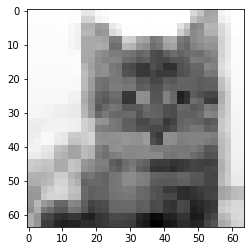

RMSE: 19.739108287426316


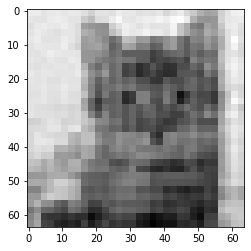

In [128]:
# test one image
path = '../common/cat.png'
camera_res = (8, 8)
slm_res = (64, 64)
sim = GhostMultiSimulator(path, slm_res, camera_res, 64*64*0.1)
cnt = sim.run_simulation()
rmse = sim.calc_rmse()
print('RMSE:', rmse)

plt.imshow(sim.G2, cmap='gray')
plt.show()

# test one image
path = '../common/cat.png'
camera_res = (1, 1)
slm_res = (64, 64)
sim = GhostSimulator(path, slm_res, 64*64*0.1)
cnt = sim.run_simulation()
rmse = sim.calc_rmse()
print('RMSE:', rmse)

plt.imshow(sim.G2, cmap='gray')
plt.show()

0.01 30.399994354655345
0.1 19.739108287426316
0.25 14.097778209857411
0.5 8.205203652187857
0.75 4.418499281486581
1 0.0


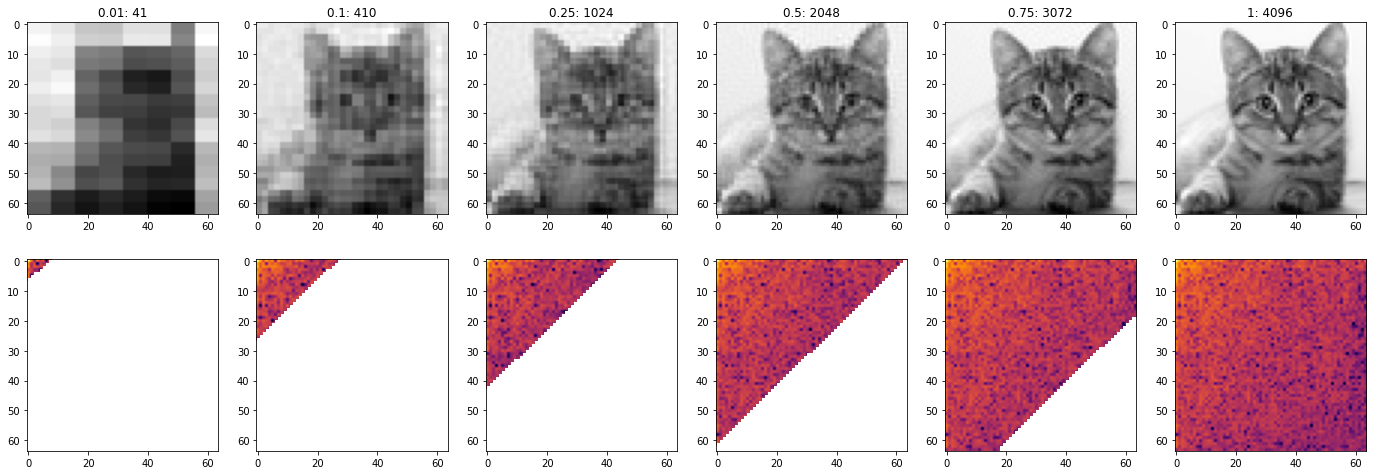

In [103]:
# try different number of filters
path = '../common/cat.png'
shape = (64, 64)

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(24, 8))

for i, w in enumerate([0.01, 0.10, 0.25, 0.5, 0.75, 1]):
    sim = GhostSimulator(path, shape, w*shape[0]*shape[1], method='zigzag')
    cnt = sim.run_simulation()
    G2, I = sim.G2, sim.I

    axs[0, i].set_title(f'{w}: {cnt}')
    axs[0, i].imshow(G2, cmap='gray')
    axs[1, i].imshow(np.log(np.abs(I), where=np.abs(I)>0), cmap='inferno')
    
    rmse = sim.calc_rmse()
    print(w, rmse)

plt.show()

0.01 34.66690388508171
0.1 20.31354439618041
0.25 14.49071125418647
0.5 9.603560721644708
0.75 4.750987753310946
1 0.0


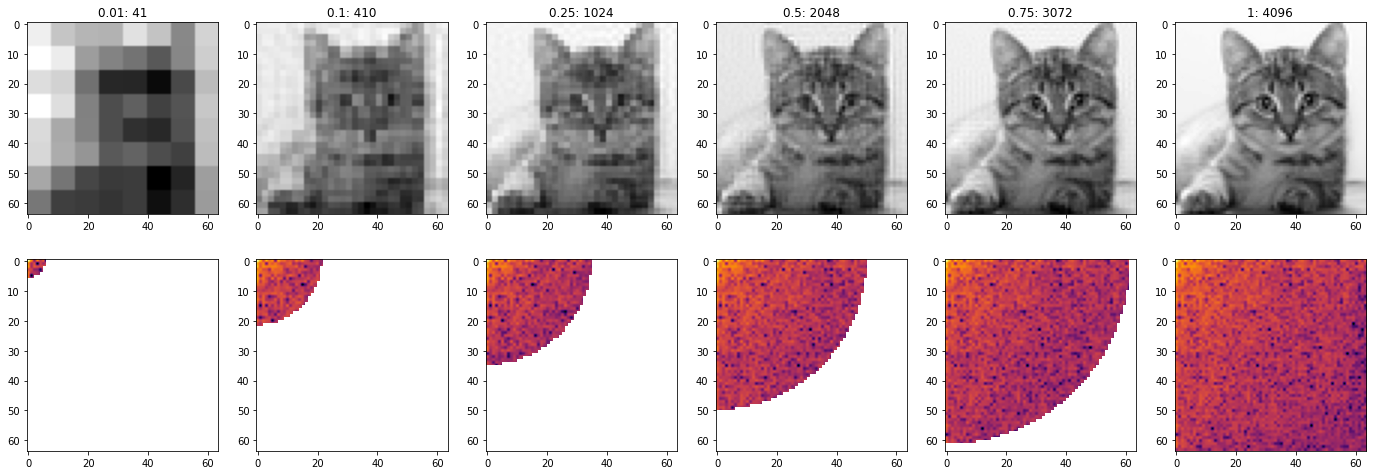

In [290]:
# try different number of filters
path = '../common/cat.png'
shape = (64, 64)

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(24, 8))

for i, w in enumerate([0.01, 0.10, 0.25, 0.5, 0.75, 1]):
    sim = GhostSimulator(path, shape, w*shape[0]*shape[1], method='circular')
    cnt = sim.run_simulation()
    G2, I = sim.G2, sim.I

    axs[0, i].set_title(f'{w}: {cnt}')
    axs[0, i].imshow(G2, cmap='gray')
    axs[1, i].imshow(np.log(np.abs(I), where=np.abs(I)>0), cmap='inferno')

    rmse = sim.calc_rmse()
    print(w, rmse)

plt.show()

0.01 37.77352720326894
0.1 20.639069948376285
0.25 14.552936606306904
0.5 10.567201222748274
0.75 6.6854420998353925
1 0.0


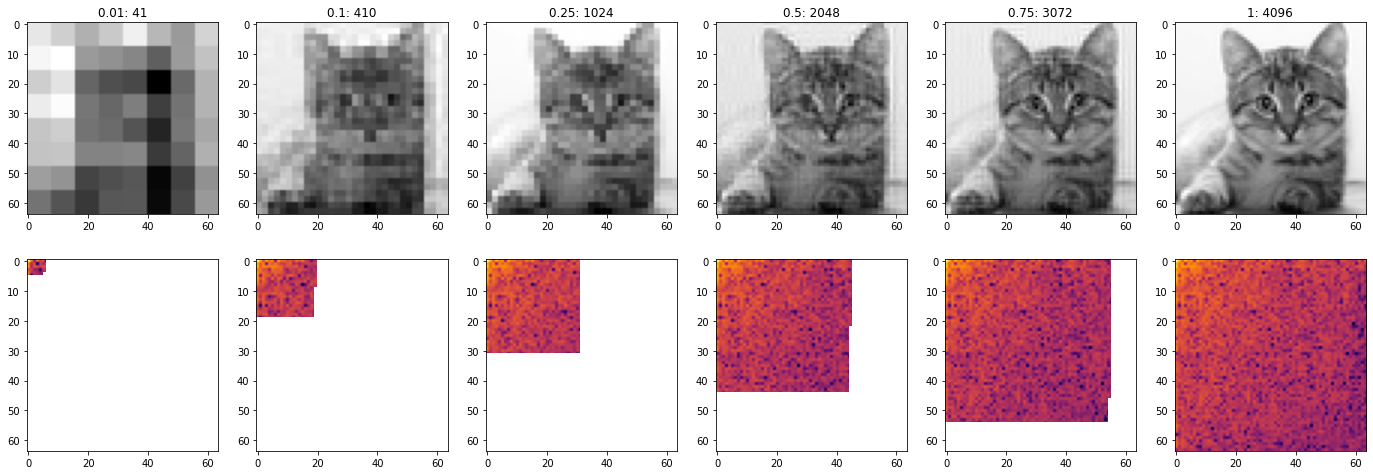

In [291]:
# try different number of filters
path = '../common/cat.png'
shape = (64, 64)

fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(24, 8))

for i, w in enumerate([0.01, 0.10, 0.25, 0.5, 0.75, 1]):
    sim = GhostSimulator(path, shape, w*shape[0]*shape[1], method='square')
    cnt = sim.run_simulation()
    G2, I = sim.G2, sim.I

    axs[0, i].set_title(f'{w}: {cnt}')
    axs[0, i].imshow(G2, cmap='gray')
    axs[1, i].imshow(np.log(np.abs(I), where=np.abs(I)>0), cmap='inferno')

    rmse = sim.calc_rmse()
    print(w, rmse)

plt.show()